## Exemplo de Features e Labels

In [7]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
HEADER = ['nao_finalizado', 'horas_esperadas', 'preco']
SEED = 20
np.random.seed(SEED)

df_data = pd.read_csv('../../../0_datasets/classification/freelances.csv', names=HEADER, header=0)
df_data['finalizado'] = df_data['nao_finalizado'].map({0: 1, 1: 0})

df_X = df_data[['horas_esperadas', 'preco']]
df_Y = df_data['finalizado']

df_data.shape

(2157, 4)

### Separação de dados de treino e teste

<Axes: xlabel='horas_esperadas', ylabel='preco'>

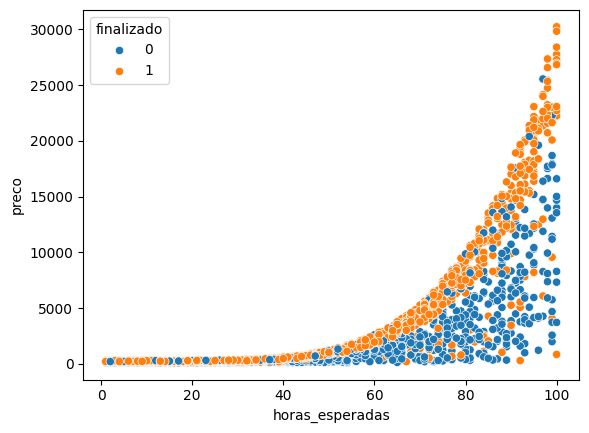

In [9]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=df_data)

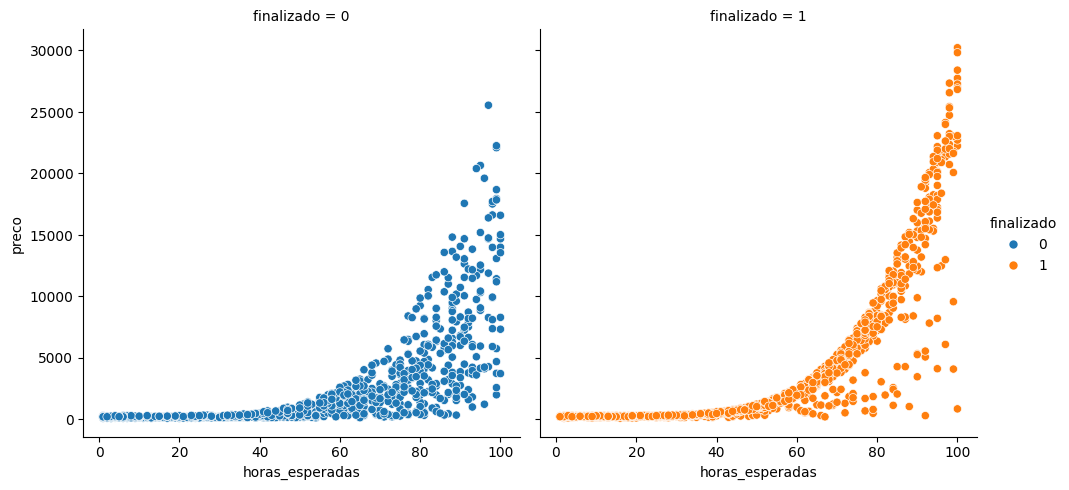

In [10]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=df_data)

In [11]:
train_x, test_x, train_y, test_y = train_test_split(df_X, df_Y, test_size=0.25, stratify=df_Y)
print('Training with %d elements and testing with %d elements' % (len(train_x), len(test_x)))

# BASELINE
baseline = np.ones(540)
accuracy_baseline = accuracy_score(test_y, baseline) * 100
print('Accuracy baseline: %.2f%%' % accuracy_baseline)

Training with 1617 elements and testing with 540 elements
Accuracy baseline: 52.59%


## Modelo SVC

In [12]:
raw_train_x, raw_test_x, train_y, test_y = train_test_split(df_X, df_Y, test_size=0.25, stratify=df_Y)


scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

modelo_svc = SVC()
modelo_svc.fit(train_x, train_y)
predictions = modelo_svc.predict(test_x)

accuracy_svc = accuracy_score(test_y, predictions) * 100
print('Accuracy: %.2f%%' % accuracy_svc)


Accuracy: 67.59%


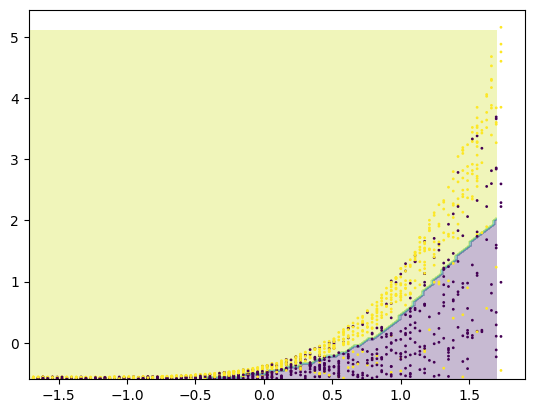

In [13]:

data_x = train_x[:, 0]
data_y = train_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo_svc.predict(pontos)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=train_y, s=1)